## Analysis

In [363]:
import pandas as pd
import os 

##### Task 1#

In [364]:
df = pd.read_csv("./Sales_April_2019_error.csv")
df = df.drop(1, axis=0)
df = df.reset_index(drop=True)
df.to_csv("./Sales_Data/Sales_April_2019.csv", index=False)

files = [i for i in os.listdir('./Sales_Data/')] 
#selects every file from given directory

all_months_data = pd.DataFrame()
#empty dataframe

for i in files:
    df = pd.read_csv(f"./Sales_Data/{i}")
    all_months_data = pd.concat([all_months_data, df])
#łączy wszystkie pliki o nazwach z listy "files" 
# i łączy jeden po drugim w jeden dataframe o nazwie "all_months_data"

all_months_data.to_csv("all_data.csv", index=False, )
#tworzy plik .csv o nazwie "all_data" bez indeksów

In [365]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [366]:
df1 = df.loc[df['Product'] == 'Google Phone']
df1.sort_values(by='Order ID', ascending=False)
df1.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
16,248167,Google Phone,1,600.0,09/02/19 18:52,"711 Forest St, San Francisco, CA 94016"
39,248189,Google Phone,1,600.0,09/14/19 12:45,"726 8th St, San Francisco, CA 94016"
49,248199,Google Phone,1,600.0,09/11/19 12:47,"780 4th St, Boston, MA 02215"
71,248219,Google Phone,1,600.0,09/24/19 12:48,"665 Maple St, Los Angeles, CA 90001"
171,248318,Google Phone,1,600.0,09/24/19 12:43,"165 Hill St, Austin, TX 73301"
176,248323,Google Phone,1,600.0,09/30/19 20:36,"725 10th St, Portland, OR 97035"
223,248365,Google Phone,1,600,09/04/19 19:37,"930 Forest St, Dallas, TX 75001"
393,248531,Google Phone,1,600,09/10/19 23:46,"544 5th St, Dallas, TX 75001"
423,248560,Google Phone,1,600,09/08/19 11:40,"772 Sunset St, Los Angeles, CA 90001"
475,248611,Google Phone,1,600,09/17/19 10:37,"448 Jackson St, New York City, NY 10001"


### Data Cleaning

###### Deleting NaN Rows

In [367]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


###### Deleting 'Or' Rows

In [368]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


###### Converting Columns to int

In [369]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Task 2: Add Month Column

In [370]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task 3: Add a sales column

In [371]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Question 1: What was the best month for sales? How much was earned that month?

In [372]:
q_1 = all_data.groupby(['Month']).sum()['Sales']
q_1 = pd.DataFrame(q_1)
q_1.head(12)


,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


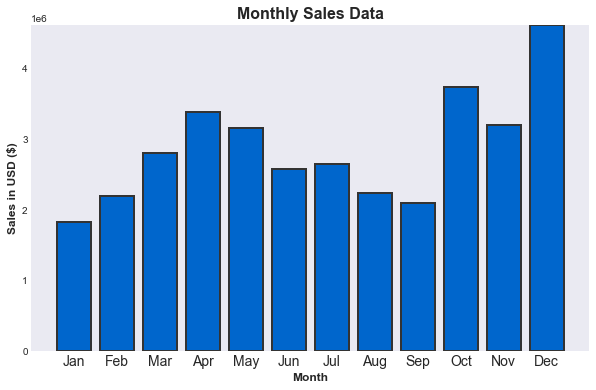

In [373]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Set the x-axis tick marks to be the month numbers
months = range(1,13)

# Create the bar plot
plt.bar(months, q_1['Sales'], width=0.8, color='#0066cc', edgecolor='#333333', linewidth=2)

# Set the x-axis tick labels to be the month names
plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=14)

# Add x- and y-axis labels
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Sales in USD ($)', fontsize=12, fontweight='bold')

# Set the title of the plot
plt.title('Monthly Sales Data', fontsize=16, fontweight='bold')

# Set the y-axis limits to range from 0 to the maximum sales value
plt.ylim([0, q_1['Sales'].max()])

# Add grid lines
plt.grid(False)



# Show the plot
plt.show()

#### Question 2: What City Had The Highest Number Of Sales

###### Adding the Column: City

In [374]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


###### Creating a PivotTable for Cities and Sales

In [375]:
q_2 = all_data.pivot_table(index=['City'], values=['Sales'], aggfunc='sum')
q_2.sort_values(by='Sales', inplace=True, ascending=False)
q_2.head(25)



,Sales
City,
San Francisco (CA),8262203.91
Los Angeles (CA),5452570.80
New York City (NY),4664317.43
Boston (MA),3661642.01
Atlanta (GA),2795498.58
Dallas (TX),2767975.40
Seattle (WA),2747755.48
Portland (OR),1870732.34
Austin (TX),1819581.75


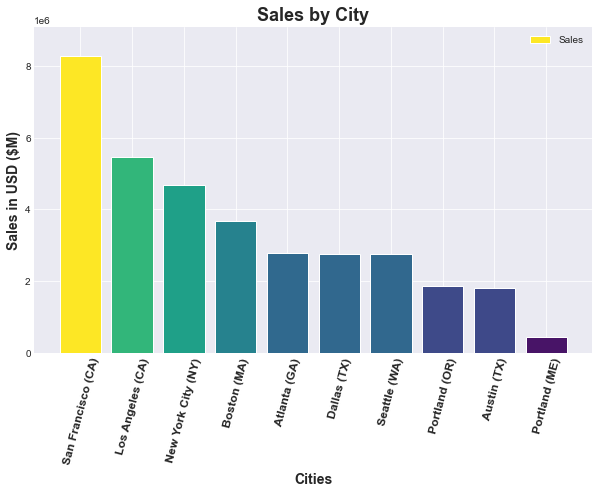

In [376]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cities = q_2.index

plt.figure(figsize=(10,6))

# Set the style of the plot
plt.style.use('seaborn-darkgrid')

# Use a color palette from matplotlib.cm
colors = cm.viridis(q_2['Sales'] / q_2['Sales'].max())

# Create the bar plot
plt.bar(cities, q_2['Sales'], color=colors)

# Rotate the x-tick labels and set the font size and weight
plt.xticks(cities, rotation=75, size=12, fontweight='bold')

# Set the x- and y-axis labels
plt.xlabel('Cities', fontsize=14, fontweight='bold')
plt.ylabel('Sales in USD ($M)', fontsize=14, fontweight='bold')

# Set the y-axis limits
plt.ylim(0, q_2['Sales'].max()*1.1)

# Add a title to the plot
plt.title('Sales by City', fontsize=18, fontweight='bold')

# Turn on the grid
plt.grid(True)

# Add a legend
plt.legend(['Sales'])

plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [377]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')

In [378]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [379]:
q_3 = all_data.pivot_table(index='Hour', aggfunc='count')
q_3.sort_values(by='Hour', inplace=True, ascending=True)
q_3.head(25)

,City,Minute,Month,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,Sales
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


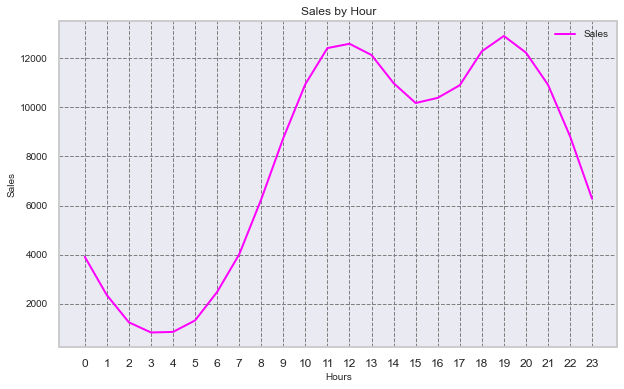

In [380]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
hours = q_3.index

# Set the style of the plot
plt.style.use('seaborn-darkgrid')


# Plot the data
plt.plot(hours, q_3['Sales'], color='#FF00FF', linewidth=2)

# Add a title to the plot
plt.title('Sales by Hour')

# Customize the appearance of the x-axis
plt.xticks(hours, rotation=0, size=12)
plt.xlabel('Hours')

# Customize the appearance of the y-axis
plt.ylabel('Sales')
plt.yticks(size=10)

# Add a legend to the plot
plt.legend(['Sales'])

# Customize the appearance of the grid lines
plt.grid(color='gray', linestyle='--', linewidth=1)

# Customize the appearance of the plot background
plt.rcParams['figure.facecolor'] = '#FFFFFF'

# Customize the appearance of the plot spines
for spine in plt.gca().spines.values():
    spine.set_color('#CCCCCE')
    spine.set_linestyle('solid')
    spine.set_linewidth(2)

# Customize the appearance of the plot ticks
plt.tick_params(color='#CCCCCC', size=8, direction='out')

# Show the plot
plt.show()

# My recommendation is around 11am or 7pm

#### Question 4: What products are most often sold "more than one"?

In [381]:
all_data[['Product', 'Quantity Ordered']].head()

,Product,Quantity Ordered
0,USB-C Charging Cable,2
1,Bose SoundSport Headphones,1
2,Google Phone,1
3,Wired Headphones,1
4,Wired Headphones,1


In [382]:
all_data['Together'] = 'No'

In [383]:
import numpy as np
 
conditions = [all_data['Quantity Ordered'] > 1]
choices = [all_data['Together'] == 'Yes']
 
all_data['Together'] = np.select(conditions, choices, default=all_data['Together'])
    

In [384]:
all_data['Together'] = all_data['Together'].replace(False, 'Yes')

In [385]:
all_data['Together'].to_frame()

,Together
0,Yes
1,No
2,No
3,No
4,No
...,...
186844,Yes
186845,No
186846,No
186847,No


In [386]:
q_4 = all_data.loc[all_data['Together'] == 'Yes']
q_4


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Together
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,Yes
27,176583,AAA Batteries (4-pack),2,2.99,2019-04-20 12:00:00,"146 Jackson St, Portland, OR 97035",4,5.98,Portland (OR),12,0,Yes
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,Yes
39,176593,Lightning Charging Cable,2,14.95,2019-04-15 13:45:00,"906 7th St, Portland, OR 97035",4,29.90,Portland (OR),13,45,Yes
41,176595,Wired Headphones,3,11.99,2019-04-02 09:11:00,"383 6th St, Los Angeles, CA 90001",4,35.97,Los Angeles (CA),9,11,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
186828,259338,AAA Batteries (4-pack),2,2.99,2019-09-02 21:29:00,"666 Lakeview St, Boston, MA 02215",9,5.98,Boston (MA),21,29,Yes
186829,259339,USB-C Charging Cable,2,11.95,2019-09-12 23:43:00,"509 Park St, Austin, TX 73301",9,23.90,Austin (TX),23,43,Yes
186830,259340,AA Batteries (4-pack),2,3.84,2019-09-18 20:18:00,"544 Hickory St, Los Angeles, CA 90001",9,7.68,Los Angeles (CA),20,18,Yes
186834,259344,AAA Batteries (4-pack),2,2.99,2019-09-10 23:33:00,"721 Madison St, San Francisco, CA 94016",9,5.98,San Francisco (CA),23,33,Yes


In [387]:
pivot = q_4.pivot_table(index='Product', values='Together' , aggfunc='count')
pivot

,Together
Product,
20in Monitor,28
27in 4K Gaming Monitor,14
27in FHD Monitor,43
34in Ultrawide Monitor,18
AA Batteries (4-pack),5244
AAA Batteries (4-pack),6915
Apple Airpods Headphones,111
Bose SoundSport Headphones,130
Flatscreen TV,19


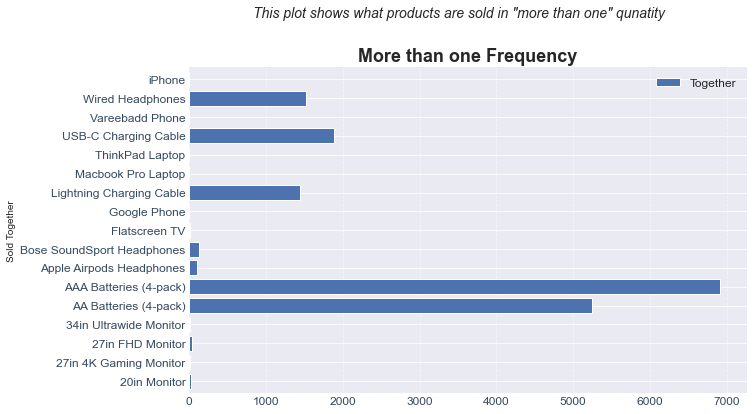

In [388]:
import seaborn as sns
sns.set_style('darkgrid')

# Set the color palette
sns.set_palette(sns.color_palette('deep', 4))

# Create the horizontal bar plot
ax = pivot.plot(kind='barh', title='Sold together frequency', xlabel='Sold Together', ylabel='Product', figsize=(10, 6), width=0.8)

# Add a grid to the plot
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

# Add a title and description to the plot
plt.title('More than one Frequency', fontsize=18, fontweight='bold')
plt.suptitle('This plot shows what products are sold in "more than one" qunatity', fontsize=14, fontstyle='italic', y=1.02)

# Customize the appearance of the x-axis tick labels
plt.xticks(fontsize=12, rotation=0, color='#34495e')

# Customize the appearance of the y-axis tick labels
plt.yticks(fontsize=12, color='#34495e')

# Customize the appearance of the plot's legend
plt.legend(fontsize=12, loc='upper right')

# Show the plot
plt.show()

#### Question 5: What products are most often sold together? Basing on ID

In [389]:
q_5 = all_data[all_data['Order ID'].duplicated(keep=False)]
q_5.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Together
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,No
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,No
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,No
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,No
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,No
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,No
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,Yes
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0,No
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7,No
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7,No


In [390]:
q_5['Grouped'] = q_5.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))
q_5 = q_5[['Order ID', 'Grouped']].drop_duplicates() 



C:\Users\Szymon\AppData\Local\Temp\ipykernel_5880\3806621317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_5['Grouped'] = q_5.groupby('Order ID')['Product'].transform(lambda x: ' , '.join(x))


In [391]:
q_5.head(20)

,Order ID,Grouped
2,176560,"Google Phone , Wired Headphones"
17,176574,"Google Phone , USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones , Bose SoundSport H..."
31,176586,"AAA Batteries (4-pack) , Google Phone"
118,176672,"Lightning Charging Cable , USB-C Charging Cable"
128,176681,"Apple Airpods Headphones , ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones , AAA Batteries (4-..."
188,176739,"34in Ultrawide Monitor , Google Phone"
224,176774,"Lightning Charging Cable , USB-C Charging Cable"
232,176781,"iPhone , Lightning Charging Cable"


###### most frequently sold in pairs

In [392]:
from collections import Counter
from itertools import combinations

count = Counter()

for row in q_5['Grouped']:
    row_list = row.split(' , ')
    count.update(Counter(combinations(row_list, 2)))

duo = count.most_common(10)


###### most frequently sold in triplets

In [393]:
count = Counter()

for row in q_5['Grouped']:
    row_list = row.split(' , ')
    count.update(Counter(combinations(row_list, 3)))

trio = count.most_common(10)

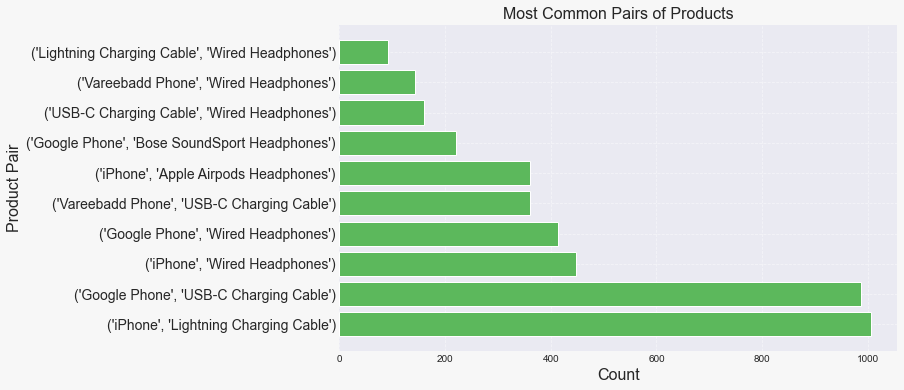

In [394]:
import matplotlib.pyplot as plt

# Extract the pairs of products and their counts from the Counter object
pairs, counts = zip(*duo)

# Set the figure size and background color
plt.figure(figsize=(10, 6), facecolor='#f7f7f7')

# Create a horizontal bar chart
plt.barh(range(len(pairs)), counts, color='#5cb85c')

# Add labels for the pairs of products
plt.yticks(range(len(pairs)), pairs, fontsize=14)

# Add a title and labels for the x and y axes
plt.title('Most Common Pairs of Products', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Product Pair', fontsize=16)

# Add grid lines
plt.grid(linestyle='--', alpha=0.5)

# Show the plot
plt.show()


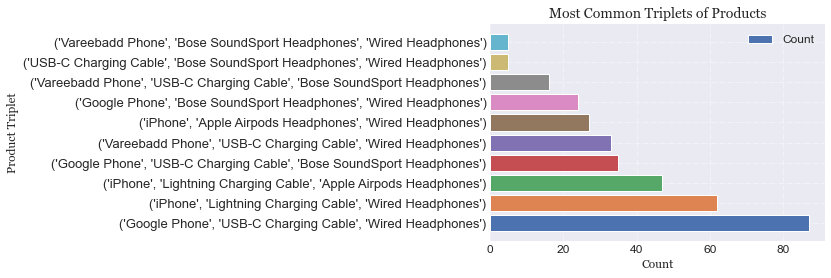

In [395]:
import matplotlib.pyplot as plt
import seaborn as sns

triplets, counts = zip(*trio)

# Create a horizontal bar chart
plt.barh(range(len(triplets)), counts, color=sns.color_palette('deep'))

# Add labels for the triplets of products
plt.yticks(range(len(triplets)), triplets, fontsize=13)

# Add a title and labels for the x and y axes
plt.title('Most Common Triplets of Products', fontsize=14, fontname='Georgia')
plt.xlabel('Count', fontsize=12, fontname='Georgia')
plt.ylabel('Product Triplet', fontsize=12, fontname='Georgia')

# Make the numbers on the x-axis larger
plt.gca().tick_params(axis='x', labelsize=12, labelrotation=0)

# Add grid lines with a different style
plt.grid(linestyle='-.', alpha=0.5)

# Add a legend to the plot
plt.legend(['Count'], loc='upper right', fontsize=12)

# Show the plot
plt.show()

#### Question 6: What products sold the most? Why do you think it did?

In [396]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Together
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,Yes
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,No
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,No
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,No
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,No


In [397]:
q_6 = all_data.pivot_table(index='Product', aggfunc='sum')['Quantity Ordered'].to_frame()
q_6

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


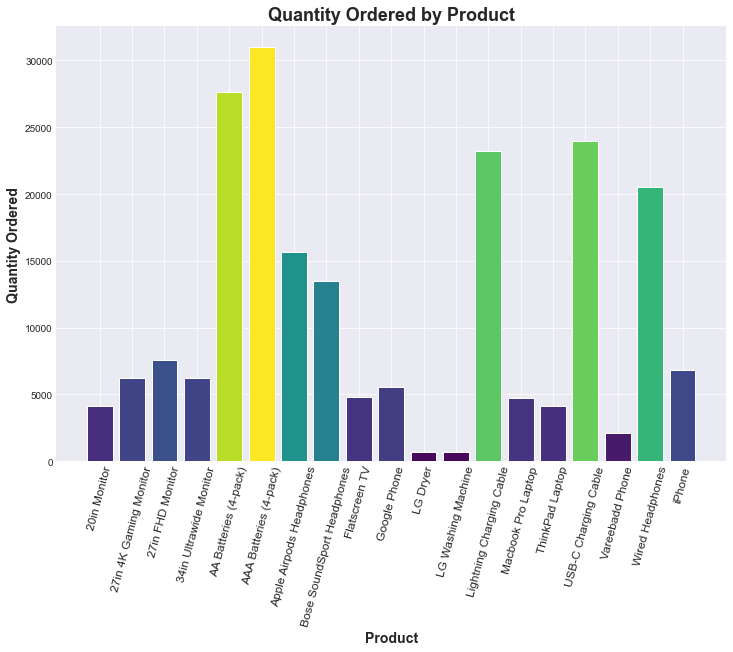

In [398]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set the figure size
plt.figure(figsize=(12, 8))

# Extract the product names and quantities
products = q_6.index
quantities = q_6['Quantity Ordered']

# Use a color palette from matplotlib.cm
colors = cm.viridis(quantities / quantities.max())

# Create the bar plot
plt.bar(products, quantities, color=colors)

# Rotate the x-tick labels and set the font size
plt.xticks(products, rotation=75, size=12)

# Set the x-axis label
plt.xlabel('Product', fontsize=14, fontweight='bold')

# Set the y-axis label
plt.ylabel('Quantity Ordered', fontsize=14, fontweight='bold')

# Add a title to the plot
plt.title('Quantity Ordered by Product', fontsize=18, fontweight='bold')

# Turn on the grid
plt.grid(True)

plt.show()

In [399]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Together
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,Yes
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,No
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,No
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,No
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,No


In [400]:
q_6_prices = all_data.pivot_table(index='Product', aggfunc='mean')
q_6_prices = q_6_prices['Price Each'].to_frame()
q_6_prices

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


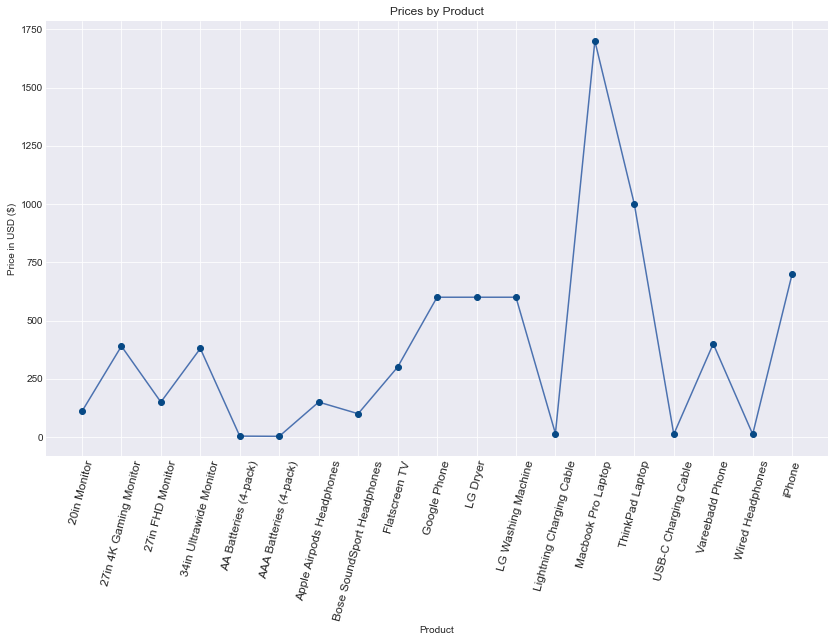

In [401]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 8))

# Extract the product names and prices
products = q_6_prices.index
prices = q_6_prices['Price Each']

# Create the line plot using the plot function
plt.plot(products, prices)

# Add the data points as a scatter plot using the scatter function
plt.scatter(products, prices, color='#074985', zorder=10)

# Rotate the x-tick labels and set the font size
plt.xticks(products, rotation=75, size=12)

# Set the x- and y-axis labels
plt.xlabel('Product')
plt.ylabel('Price in USD ($)')

# Add a title to the plot
plt.title('Prices by Product')

plt.show()





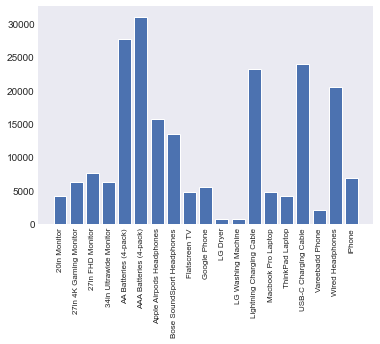

In [402]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.grid(False)
plt.show()



C:\Users\Szymon\AppData\Local\Temp\ipykernel_5880\2180317291.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=10)


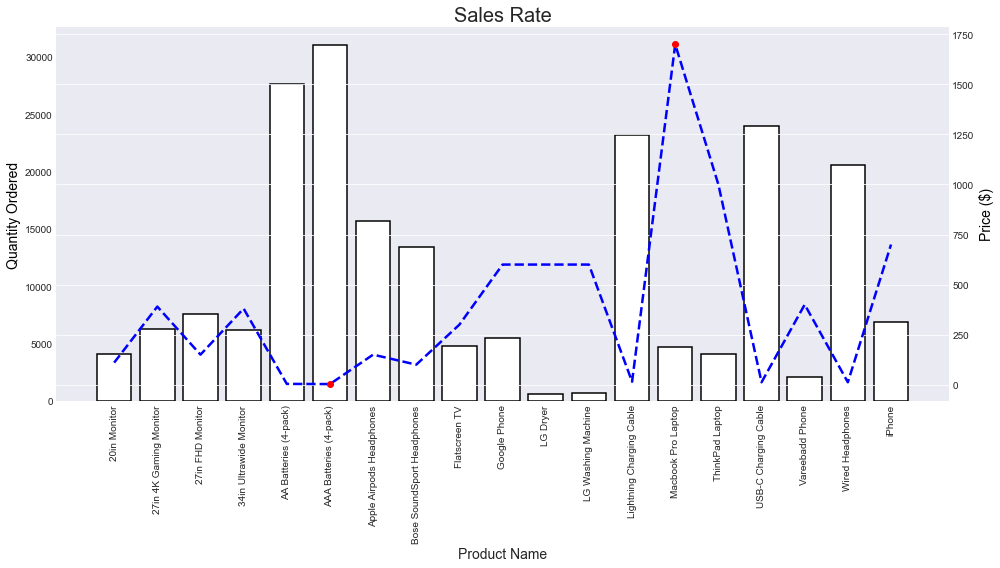

In [403]:
import matplotlib.pyplot as plt

# Set figure size and create subplots
fig, ax1 = plt.subplots(figsize=(14, 8))

# Remove grid lines
ax1.grid(False)

# Get average prices for each product
prices = all_data.groupby('Product').mean()['Price Each']

# Set bar chart properties
ax1.bar(keys, quantity_ordered, color='white', edgecolor='black', linewidth=1.5)

# Set second y-axis
ax2 = ax1.twinx()

# Set line chart properties
line = ax2.plot(keys, prices, color='b', linewidth=2.5, linestyle='--')

# Highlight highest and lowest points in line plot
highest_index = prices.idxmax()
highest_coord = (highest_index, prices[highest_index])
lowest_index = prices.idxmin()
lowest_coord = (lowest_index, prices[lowest_index])
ax2.scatter(highest_coord[0], highest_coord[1], marker='o', color='red', zorder=10)
ax2.scatter(lowest_coord[0], lowest_coord[1], marker='o', color='red', zorder=10)

# Set axis labels and tick labels
ax1.set_xlabel('Product Name', fontsize=14)
ax1.set_ylabel('Quantity Ordered', color='black', fontsize=14)
ax2.set_ylabel('Price ($)', color='black', fontsize=14)
ax1.set_xticklabels(keys, rotation='vertical', size=10)

# Set title and adjust margins
plt.title('Sales Rate', fontsize=20)
plt.tight_layout()

# Display plot
plt.show()

#### Q6 Answer: so products with the lowest price have the biggest sold rate